In [1]:
import os
import gensim
from load_vectors import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

unable to import 'smart_open.gcs', disabling that module


In [2]:
def analogy(a,b,x, topn=10, delta = 1):

    y_potential = np.array(wv.most_similar(positive=[b, x], negative=[a], topn=1000 * topn))    
    y_res = [y for y in y_potential if np.linalg.norm(np.array(wv[y[0]]) - np.array(wv[x])) < delta]

    return np.array(y_res)[:min(topn,len(y_res))]

In [3]:
analogy('african-american', 'criminal', 'caucasian', delta=1)

array([['copyspace', '0.43548518419265747'],
       ['white-collar', '0.421195387840271'],
       ['copy-space', '0.4126054048538208'],
       ['businessteam', '0.3514088988304138'],
       ['closeup', '0.3378716707229614'],
       ['financially-motivated', '0.3356950581073761'],
       ['businesswoman', '0.304948627948761'],
       ['white-collared', '0.3030710816383362'],
       ['background', '0.30270814895629883'],
       ['mid-adult', '0.3012596070766449']], dtype='<U31')

In [63]:
analogy('black', 'criminal', 'white', delta=1)

array([['background', '0.3604211211204529'],
       ['supremacist', '0.3353336453437805'],
       ['racially-motivated', '0.3348279595375061'],
       ['white-hating', '0.32201069593429565'],
       ['intra-racial', '0.31985798478126526'],
       ['racially-tinged', '0.3172609508037567'],
       ['white-supremacist', '0.3148684501647949'],
       ['white-on-white', '0.3064350485801697'],
       ['cross-burning', '0.30337032675743103'],
       ['supremist', '0.2995809316635132']], dtype='<U34')

In [59]:
analogy('black', 'gang', 'white', delta=1)

array([['supremacist', '0.4007965624332428'],
       ['skin-head', '0.4006885290145874'],
       ['peckerwoods', '0.3975106477737427'],
       ['supremist', '0.3964173495769501'],
       ['supremacists', '0.37695053219795227'],
       ['white-supremacist', '0.37045812606811523'],
       ['hoodie-wearing', '0.3673422932624817'],
       ['supremists', '0.3510963022708893'],
       ['white-hating', '0.3484446406364441'],
       ['supremicist', '0.34474560618400574']], dtype='<U27')

In [132]:
analogy('white', 'police', 'black', delta=1)

array([['nightriders', '0.3457847237586975'],
       ['racially-motivated', '0.3340671956539154'],
       ['gangster-style', '0.3148883879184723'],
       ['military-looking', '0.29585129022598267'],
       ['trenchcoated', '0.2765907347202301'],
       ['black-hooded', '0.2693210542201996'],
       ['hoodie-wearing', '0.2670661509037018'],
       ['white-led', '0.2659369111061096'],
       ['black-power', '0.26517051458358765'],
       ['black-masked', '0.26066577434539795']], dtype='<U27')

In [140]:
def cos(a,b,x,y):
    aVec = np.array(wv[a])
    bVec = np.array(wv[b])
    xVec = np.array(wv[x])
    yVec = np.array(wv[y])
    numerator = (aVec-bVec).dot(xVec-yVec)
    denominator = np.linalg.norm(aVec-bVec)*np.linalg.norm(xVec-yVec)
    return numerator/(denominator if denominator != 0 else 1e-6)

In [141]:
def generate_analogies(a,b, delta=1):
    result = []
    i=1
    for x in wv.vocab:
        for y in wv.vocab:
            if np.linalg.norm(np.array(wv[y[0]]) - np.array(wv[x])) < delta:
                result.append([a,b,x,y, cos(a,b,x,y)])
    if i % ((len(wv.vocab)**2) // 100) == 0:
        print(i *100 // (len(wv.vocab)**2))
    return result

In [142]:
result = generate_analogies("blacks", "whites")

KeyboardInterrupt: 

In [121]:
race = {'african_american' : ['african american', 'black','blacks'],
       'caucasian' : ['caucasian', 'white', 'whites']}

In [122]:
crime_lexicon = pd.read_csv("data/crime_lexicon.csv", index_col=0)
print(crime_lexicon.shape)
crime_lexicon.head()

(576, 2)


,query_word,word
0,assault,attack
1,assault,sexual assault
2,assault,rape
3,assault,battery
4,assault,violation


In [123]:
def cosine_similarities(word1, words_all):
    w1 = wv.get_vector(word1)
    vectors_all = [wv.get_vector(word) for word in words_all]
    return wv.cosine_similarities(w1, vectors_all)

In [124]:
sim_array = []
for r, words in race.items():
    similarities = np.zeros(len(crime_lexicon))
    for w in words:
        similarities += cosine_similarities(w, crime_lexicon.word.values) / len(words)
        
    crime_lexicon['similarity_' + r] = similarities

In [125]:
crime_lexicon.head()

,query_word,word,similarity_african_american,similarity_caucasian
0,assault,attack,0.067332,0.038630
1,assault,sexual assault,0.187763,0.092445
2,assault,rape,0.187724,0.177497
3,assault,battery,0.082161,0.100014
4,assault,violation,0.071319,0.051850


In [126]:
crime_lexicon['diff'] = crime_lexicon.similarity_african_american - crime_lexicon.similarity_caucasian

In [127]:
crime_lexicon.describe()

,similarity_african_american,similarity_caucasian,diff
count,576.000000,576.000000,576.000000
mean,0.105702,0.095168,0.010535
std,0.047088,0.050294,0.035066
min,-0.066794,-0.038981,-0.085271
25%,0.072907,0.058747,-0.012045
50%,0.102426,0.092671,0.006212
75%,0.136089,0.126573,0.028574
max,0.268197,0.279949,0.139174


In [128]:
crime_lexicon.sort_values('diff', ascending=True).head(5)

,query_word,word,similarity_african_american,similarity_caucasian,diff
148,burglary,asportation,0.051241,0.136512,-0.085271
84,assault,misdemeanor,0.040950,0.125755,-0.084805
394,crime,misdemeanour,0.018114,0.101556,-0.083442
72,assault,felony,0.080304,0.156879,-0.076576
67,assault,mug,0.101329,0.174782,-0.073453


In [129]:
crime_lexicon.sort_values('diff', ascending=False).head(5)

,query_word,word,similarity_african_american,similarity_caucasian,diff
83,assault,statutory rape,0.184091,0.044916,0.139174
430,crime,infelonious,0.193940,0.058640,0.135300
919,gang,work party,0.183947,0.049543,0.134404
158,burglary,criminal contempt,0.202411,0.082077,0.120334
159,burglary,bolt cutter,0.149188,0.029501,0.119687


In [130]:
crime_lexicon.groupby('query_word').mean().sort_values("diff", ascending=False)

,similarity_african_american,similarity_caucasian,diff
query_word,,,
burglary,0.113536,0.093776,0.019760
drugs,0.101549,0.085052,0.016497
criminal,0.112135,0.095719,0.016416
prison,0.108561,0.093492,0.015069
crime,0.107709,0.096775,0.010935
fraud,0.087705,0.077197,0.010508
assault,0.094455,0.090336,0.004119
police,0.107968,0.105473,0.002495
gang,0.121850,0.120001,0.001849


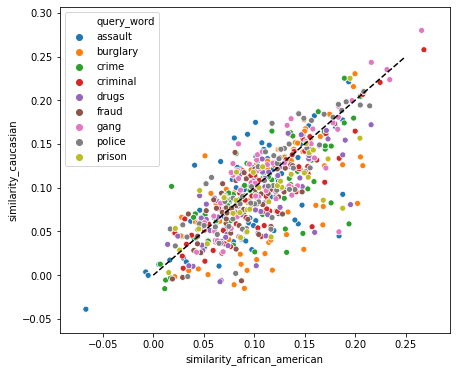

In [131]:
plt.figure(figsize=(7,6))
sns.scatterplot(x="similarity_african_american", y="similarity_caucasian", hue="query_word",
                data=crime_lexicon)
plt.plot([0,0.25], [0,0.25], c='black', linestyle='--')
plt.show()

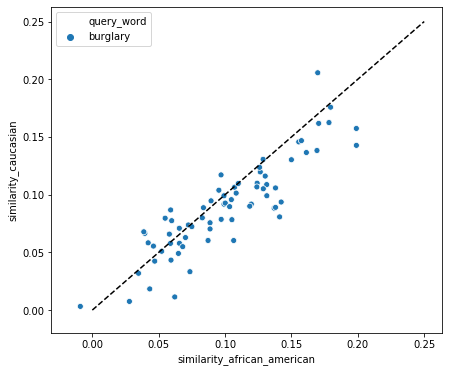

In [109]:
plt.figure(figsize=(7,6))
sns.scatterplot(x="similarity_african_american", y="similarity_caucasian", hue="query_word",
                data=crime_lexicon.loc[crime_lexicon.query_word.isin(['burglary'])])
plt.plot([0,0.25], [0,0.25], c='black', linestyle='--')
plt.show()